In [18]:
import pandas as pd                   
import matplotlib.pyplot as plt       
import matplotlib as mpl              
import numpy as np                  
%matplotlib inline
from numpy._distributor_init import NUMPY_MKL
import scipy as sp 
from scipy import stats
import statsmodels.formula.api as smf # package we'll be using for linear regression
plt.style.use("fivethirtyeight")

## Regression and  R Explains the following.

Questions.
1. is there a linear relationship between the two variables? **Simple Regression/OLS**
2. Do they have a strong relationship? ** R value **
3. Can we predict based on the dataset? **Regression line/Trendline** 
4. Is our model reliable? **R-square** 

** Relation between 'height' & 'approaval ratings of US presidents' **

Condition  
    * Variable A : 'height'   ................................**INPUT**
    * Variable B : 'approaval ratings of US presidents'  .....**OUTPUT**
    * Variable C : 'US presidents'............................Instances


In [51]:
# Example  Data Table
sample_list = [185,47,182,49.9,188,55.1,188,60.9]
ex02 = pd.DataFrame(np.asarray(sample_list).reshape(4,2),
                    index=['Obama','Bush_2','Clinton','Bush_1'],columns = ['height','approval_rating'])

In [20]:
ex02

,height,approval_rating
Obama,185.0,47.0
Bush_jr,182.0,49.9
Clinton,188.0,55.1
Bush_sr,188.0,60.9


In [21]:
# 1. Linerar relationship?
# Scatter plot
# height           >> Independent variable 'x'
# approval rating  >> dependent variable 'y'

x = 'height'
y = 'approval_rating'

 
1.561 x - 236.7


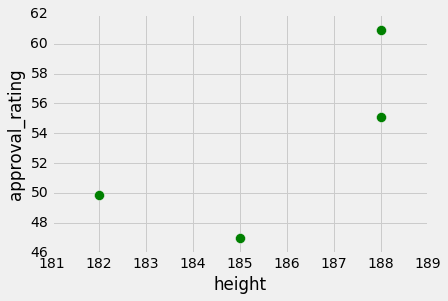

In [38]:
ex02.plot(kind="scatter",x="height",y="approval_rating",s=100, c='g')

In [60]:
lm = smf.ols(formula="approval_rating~height",data=ex02).fit()

In [61]:
type(lm.params)

pandas.core.series.Series

In [27]:
lm.params 

Intercept   -236.657576
height         1.560606
dtype: float64

In [28]:
intercept, slope = lm.params 

In [52]:
coefficients = np.polyfit(ex02[x], ex02[y], 1)
polynomial = np.poly1d(coefficients) # regression 
print (polynomial)

 
1.561 x - 236.7


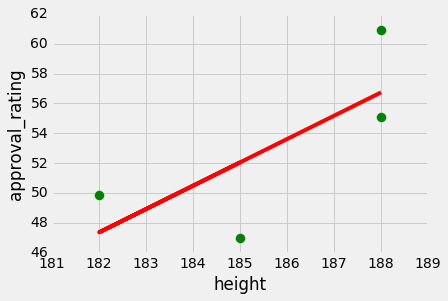

In [36]:
ex02.plot(kind="scatter",x="height",y="approval_rating",s=100, c='g')
plt.plot(ex02["height"],slope*ex02["height"]+intercept,"-",color="red")

In [35]:
lm.summary()

c:\users\dongjin\envs\03stat\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        approval_rating   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     2.321
Date:                Thu, 04 Aug 2016   Prob (F-statistic):              0.267
Time:                        11:49:05   Log-Likelihood:                -10.804
No. Observations:                   4   AIC:                             25.61
Df Residuals:                       2   BIC:                             24.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -236.6576    190.307     -1.244      0.340   -1055.481     582.166
height         1.5606      1.024      1.523      0.267      -2.847       5.968
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.088
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.422
Skew:                          -0.241   Prob(JB):                        0.810
Kurtosis:                       1.484   Cond. No.                     1.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
ex02.corr()

,height,approval_rating,height_zscore,approval_rating_zscore,ZxZy
height,1.000000,0.732877,1.000000,0.732877,-0.035049
approval_rating,0.732877,1.000000,0.732877,1.000000,0.601803
height_zscore,1.000000,0.732877,1.000000,0.732877,-0.035049
approval_rating_zscore,0.732877,1.000000,0.732877,1.000000,0.601803
ZxZy,-0.035049,0.601803,-0.035049,0.601803,1.000000


**Pearson's r ?**
r = sum(ZxZy)/(n-1)

* To compute Pearson's r, we need this formula.  
* To start with, we need to compute all the z-scores of both our x and y.    
* we need the means and standard deviations of these variables.  


In [40]:
# step 01. mean and std

Sx = ex02['height'].std()
Sy = ex02['approval_rating'].std()
Mx = ex02['height'].mean()
My = ex02['approval_rating'].mean()

print(Mx,My,Sx,Sy,)

185.75 53.225 2.87228132327 6.11630334979


In [44]:
# step 02. calculate z score
# example) Obama_height_zscore = ( 180 - 185 )/ 185.75 = -0.261
cols = list(ex02.columns)
for col in cols:
    col_zscore = col + '_zscore'
    ex02[col_zscore] = (ex02[col] - ex02[col].mean())/ex02[col].std() 

In [45]:
ex02['ZxZy'] = ex02['approval_rating_zscore']*ex02['height_zscore']

In [47]:
pearson_r = ex02['ZxZy'].sum()/(len(ex02['ZxZy'])-1)
pearson_r

0.73287726008754428

In [49]:
ex02.corr()['approval_rating']['height']

0.73287726008754417

In [54]:
# step 03. regression equation and regression line
# regression slope b = r(Sy/Sx)
# intercept a = My - b(Mx)
# regression line ^y(y_hat) = a + bx

b = pearson_r * (Sy/Sx)
a = My - b*Mx

print(a,b)

-236.657575758 1.56060606061


In [55]:
# step 04. r_square
r_square = (pearson_r)**2
r_square

# interpretation
#  01. the prediction error is 53% smaller when the regression line is used than employ the mean of the dv. 
#  02. 53% of the variation, or the variance in the dv, is explained by our independent variable. 

0.53710907835342603